# Quantum Computer lab 2

These lab exercises are **NOT** part of the assesment of the module, but they should be useful training for the coursework.

* This notebook introduces some of the basic quantum circuit functionality in the qiskit module
* Please run the code to make sure it works, then try the questions.

There is documentation about qiskit at https://qiskit.org/ and https://learning.quantum-computing.ibm.com/

##  Goals of the lab

* Investigate quantum phase estimation using a quantulm computer simulator
* Investigate the Quantum Fourier Transform

In later labs we will investigate introducing additional errors

## Installing qiskit

There is information on installing qiskit at:  https://qiskit.org/documentation/getting_started.html
I really recommend using a virtual enviroment to install qiskit

* You can run on IBM's simulator using  https://quantum-computing.ibm.com/


##  Installing qiskit on the University machines
These instructions are modified from the material developed by Vincent Drach. Unfortunately, you will have to do this everytime you start a new session.

* Start the anconda prompt
* conda create --name qiskit
* conda activate qiskit
* conda install numpy matplotlib spyder-kernels
* pip install qiskit
* pip install qiskit-aer
* pip install qiskit[visualization]

In Spyder Open Tools -> Preferences
select "Use the following python interpreter" and select the path of your installation

C:/Users/vdrach/.conda/envs/qiskit/python.exe

To check the enviroment, restart the kernel in the console



* Run the qiskit code above for the cases: 00, 01, 10, 11
* Check that the circuit works. If it does not work, modify the code



## Quantum Fourier Transform

Based on the material from https://quantumcomputinguk.org/tutorials/quantum-fourier-transform-in-qiskit


##  Question Quantum Phase Estimation

The aim of this section is to numerically investigate the quantum phase estimation algorithm. This is an algorithm to estimate the eigenvalue of a unitary matrix. We will first use a simple matrix with known eigenvalues.

* Background to Quantum Phase Estimation https://en.wikipedia.org/wiki/Quantum_phase_estimation_algorithm

Based on https://github.com/qiskit-community/qiskit-textbook/blob/main/content/ch-algorithms/quantum-phase-estimation.ipynb

We want to estimate the phase 

$$
U \mid \psi \rangle = e^{2 i \pi \phi } \mid \psi \rangle
$$

We will use the two by two matrix below that depends on the parameter $\lambda$
$$
\begin{split}p(\lambda) =
\begin{pmatrix}
1 & 0 \\
0 & e^{i \lambda}
\end{pmatrix},\end{split}
$$

**Question** what are the eigenvalues and eigenvectors of $p(\lambda)$  ?

A good source of documentation on the different quantum gates in qiskit is https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html


In the circuit the controled P gate is used

$$
\begin{split}C_{p}(\lambda) =
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\lambda}
\end{pmatrix}\end{split}
$$



In [16]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math
from math import pi

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.visualization import plot_histogram

## First look at the matricies

There is documentation about the different gates at: 
https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html


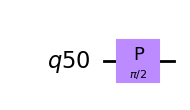

In [58]:
## This is the controlled P matrix used in the circuit
q1 = QuantumRegister(1)
qc1 = QuantumCircuit(q1)
qc1.p(pi/2,q1[0])
qc1.draw("mpl")

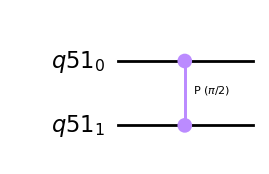

In [59]:
## This is the controlled P matrix used in the circuit
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cp(pi/2,q[0], q[1])
qc.draw("mpl")

### Function to do inverse quantum fourier transform

In [14]:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)


In [61]:
#### Code to do the quantum phase estimation

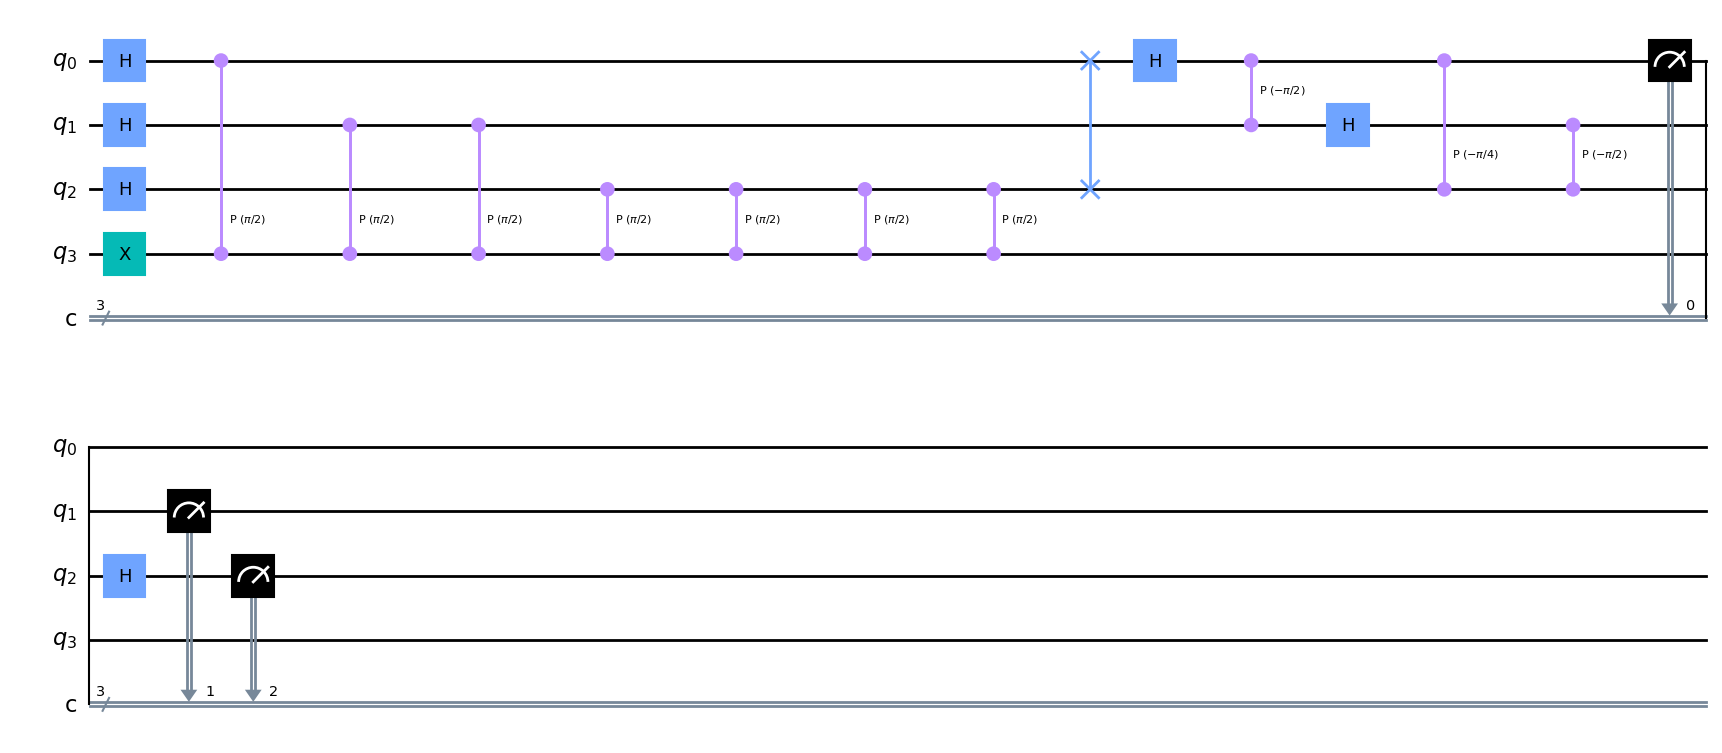

In [62]:
# Create and set up circuit
qpe2 = QuantumCircuit(4, 3)

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe2.h(qubit)

# Prepare our eigenstate |psi>:
# QUESTION what does this line do. Why is it required?
qpe2.x(3)

# Do the controlled-U operations:
#angle = 2*math.pi/3
#angle = 2*math.pi/2
angle = 2*math.pi/4
#angle = 2*math.pi/8

repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe2, 3)

# Measure of course!
for n in range(3):
    qpe2.measure(n,n)

qpe2.draw("mpl")


/tmp/ipykernel_491748/2280759256.py:5: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


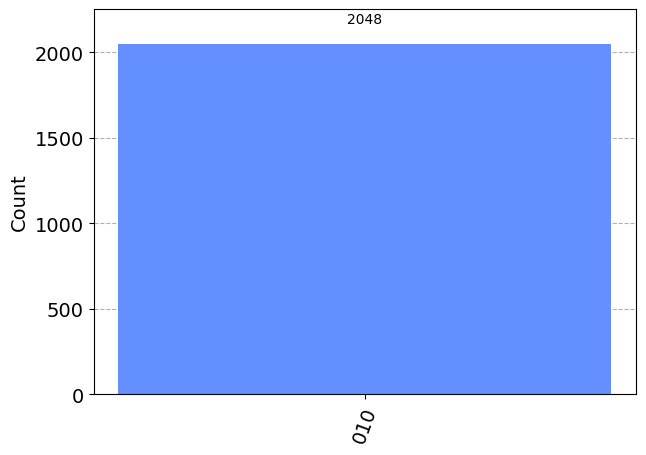

In [63]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe2 = transpile(qpe2, aer_sim)
qobj = assemble(t_qpe2, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

The result for the phase is in the form of binary decimal notation  
$ x = 0. \phi_1 \phi_2 \phi_3 $   

where $\phi_j$ is 1 or  0

$x = \phi_1 / 2 + \phi_2 / 4 + \phi_3 / 8 $ 


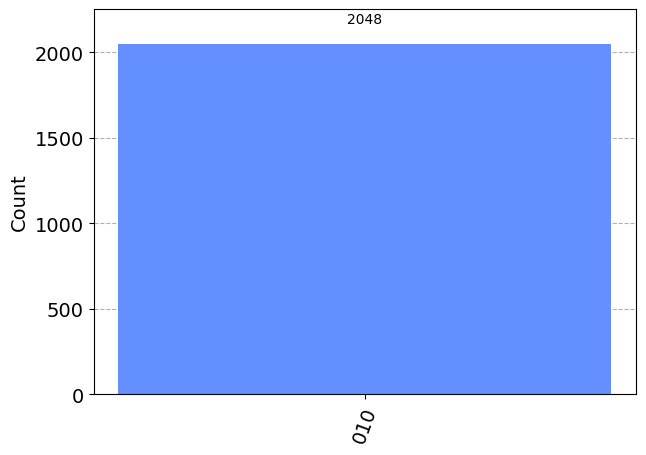

In [64]:
plot_histogram(answer)

### Questions

The goal of this question is to study the quantum phase algorithm with a simple matrix with known eigenvalues
and eigenvectors. When you get a numerical result back, you should compare it with the known eigenvalues.

Run the above circuit for angle = $2 \pi / 2$ , $2 \pi / 4$  , $2 \pi / 8$.
Can you understand the result.

Run the code for angle = $2 \pi / 3$. What do you notice?

Comment out the line qpe2.x(3).  Do you agree with the result?

Change the line qpe2.x(3) to qpe2.h(3). Run the code for angle = $2 \pi / 2$ , $2 \pi / 4$  , $2 \pi / 8$, $2 \pi / 3$.
What do you notice


## Question

On the web page https://github.com/qiskit-community/qiskit-textbook/blob/main/content/ch-algorithms/quantum-phase-estimation.ipynb
there is an example of a code that uses 6 counting bits. By studying this code write a function that does quantum phase estimation using
an input number of counting bits. Also make the angle an argument of the function.

Study the accuracy of the result as a function of counting bits for the angle $2\pi/3$. Using a large number of counting bits may require a
lot of memory so be careful. 



In [65]:
def find_quantum_phase(no_count_bits, angle) :
     print("Number of counting bits " , no_count_bits)
     print("Input angle = " , angle )
    

## Bonus Question

This is a mini-project type question. The test matrix we used was a simple diagonal matrix. It would be interesting to modify the code to use a non-diagonal matrix, such as a U-gate.

\begin{split}U(\theta, \phi, \lambda) =
    \begin{pmatrix}
        \cos\left(\frac{\theta}{2}\right)          & -e^{i\lambda}\sin\left(\frac{\theta}{2}\right) \\
        e^{i\phi}\sin\left(\frac{\theta}{2}\right) & e^{i(\phi+\lambda)}\cos\left(\frac{\theta}{2}\right)
    \end{pmatrix}\end{split}

The code below creates the matrix and computes the eigenvalues with standard python. This can be used to compare the results
from the phase estimation.


In [66]:
q = QuantumRegister(1)
qU = QuantumCircuit(q)
qU.u(pi/2,pi/4,pi/8,q)
qU.draw()

┌────────────────┐
q57: ┤ U(π/2,π/4,π/8) ├
     └────────────────┘

In [67]:
from qiskit import BasicAer
backend = BasicAer.get_backend('unitary_simulator')
job = backend.run(transpile(qU, backend))
matrix = job.result().get_unitary(qU, decimals=3)
matrix

array([[ 0.707+0.j   , -0.653-0.271j],
       [ 0.5  +0.5j  ,  0.271+0.653j]])

In [55]:
from numpy import linalg as LA

In [56]:
eigenvalues, eigenvectors = LA.eig(matrix)
print(eigenvalues)

[0.93842902-0.34585756j 0.03957098+0.99885756j]


## Quantum Fourier Transform

Based on the material from https://quantumcomputinguk.org/tutorials/quantum-fourier-transform-in-qiskit


In [21]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

### Theory behind 3 qubit Quantum Fourier Transform

<img src="https://github.com/cmcneile/Quantum_Computing_lab_2023/blob/main/3qubit_qft.png?raw=true" alt="QFT">

Page from  https://learn.qiskit.org/course/ch-algorithms/quantum-fourier-transform


###  Code for quantum Fourier transform
The code below does a 3 qubit quantum Fourier transform. 

It implements the above mathematics

In [22]:
qc = QuantumCircuit(3)

In [23]:
qc.h(2)
qc.draw()

q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ H ├
     └───┘

In [24]:
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.draw()

q_0: ──────────────
                   
q_1: ──────■───────
     ┌───┐ │P(π/2) 
q_2: ┤ H ├─■───────
     └───┘

In [25]:
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.draw()

q_0: ───────────────────────
                            
q_1: ──────■────────■───────
     ┌───┐ │P(π/2)  │P(π/2) 
q_2: ┤ H ├─■────────■───────
     └───┘

In [26]:
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.draw()

┌───┐
q_0: ─────────────────────────────■───────┤ H ├
                            ┌───┐ │P(π/2) └───┘
q_1: ──────■────────■───────┤ H ├─■────────────
     ┌───┐ │P(π/2)  │P(π/2) └───┘              
q_2: ┤ H ├─■────────■──────────────────────────
     └───┘

In [27]:
qc.swap(0,2)
qc.draw()

┌───┐   
q_0: ─────────────────────────────■───────┤ H ├─X─
                            ┌───┐ │P(π/2) └───┘ │ 
q_1: ──────■────────■───────┤ H ├─■─────────────┼─
     ┌───┐ │P(π/2)  │P(π/2) └───┘               │ 
q_2: ┤ H ├─■────────■───────────────────────────X─
     └───┘

In [28]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(qc)

#job = execute(qc, backend=backend, shots=1, memory=True)
job_result = job.result()
statevector = job_result.get_statevector(qc)

statevector


Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))


In [66]:
statevector.draw(output='latex') 

<IPython.core.display.Latex object>

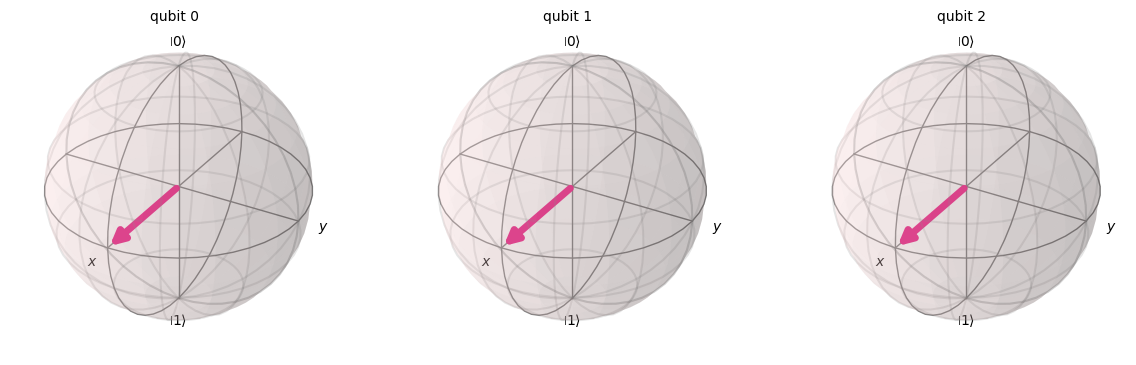

In [29]:
plot_bloch_multivector(statevector)

## Inverse Fourier Transform

Add an inverse quantum Fourier transform to the circuit.

This will allow you to check that the applying the inverse Fourier Transform produces the initial result

The qft_dagger function is defined above

In [30]:
qc_invFT = qc

qft_dagger(qc_invFT, 3)


### Question

We now run the circuit. Is the result what you expect?

In [68]:
job = backend.run(qc_invFT)

#job = execute(qc, backend=backend, shots=1, memory=True)
job_result = job.result()
statevector = job_result.get_statevector(qc_invFT)

statevector


Statevector([ 1.00000000e+00-1.8369702e-16j,
              3.69569864e-17+1.5308085e-17j,
             -8.63614149e-18+3.0616170e-17j,
              6.34081642e-18+1.5308085e-17j,
             -1.11022302e-16+6.1232340e-17j,
             -6.34081642e-18+1.5308085e-17j,
             -6.98684814e-17+3.0616170e-17j,
             -3.69569864e-17+1.5308085e-17j],
            dims=(2, 2, 2))


In [69]:
statevector.draw(output='latex') 

<IPython.core.display.Latex object>

## Investigate the phases from the 3 qubit QFT

We need to change the code so that we can put in an arbitary initial state rather than $\mid 000  \rangle$

In [46]:

def three_qubit_qft(qc_) :
  qc_.h(2)
  qc_.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
  qc_.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
  qc_.h(1)
  qc_.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
  qc_.h(0)
  qc_.swap(0,2)


### Run a quantum Fourier transform

First run the code to check that it works for $\mid 000 \rangle$ 

You can change the input state from $\mid 000 \rangle$ using NOT gates.

Try using some other input states such as $\mid 010 \rangle$ to understand the phases and make sure $\mid 010 \rangle$  is returned after the
QFT and inverse QFT is applied.

In [61]:
qcA = QuantumCircuit(3)

# 
qcA.x(1)

In [62]:
three_qubit_qft(qcA) 

In [63]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(qcA)

#job = execute(qc, backend=backend, shots=1, memory=True)
job_result = job.result()
statevector = job_result.get_statevector(qcA)
statevector

Statevector([ 3.53553391e-01-4.32978028e-17j,
              6.49467042e-17+3.53553391e-01j,
             -3.53553391e-01+4.32978028e-17j,
             -6.49467042e-17-3.53553391e-01j,
              3.53553391e-01-4.32978028e-17j,
              6.49467042e-17+3.53553391e-01j,
             -3.53553391e-01+4.32978028e-17j,
             -6.49467042e-17-3.53553391e-01j],
            dims=(2, 2, 2))


### Now apply the inverse quantum Fourier transform

In [64]:
qft_dagger(qcA, 3)

Run the inverse QFT

In [65]:
jobA = backend.run(qcA)

#job = execute(qc, backend=backend, shots=1, memory=True)
job_resultA = jobA.result()
statevectorA = job_resultA.get_statevector(qcA)

statevectorA.draw(output='latex') 

<IPython.core.display.Latex object>

In [60]:
statevectorA

Statevector([ 1.00000000e+00-1.8369702e-16j,
              3.69569864e-17+1.5308085e-17j,
             -8.63614149e-18+3.0616170e-17j,
              6.34081642e-18+1.5308085e-17j,
             -1.11022302e-16+6.1232340e-17j,
             -6.34081642e-18+1.5308085e-17j,
             -6.98684814e-17+3.0616170e-17j,
             -3.69569864e-17+1.5308085e-17j],
            dims=(2, 2, 2))
